In [5]:
# Importing pandas
import pandas as pd

In [6]:
# Reading file for data processing
df = pd.read_csv("fires.csv")


<ipython-input-6-25869579cb2a>:2: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("fires.csv")


In [7]:
# Displaying first 10 records of the dataset
df.head(10)

,FIRE_NAME,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,FIRE_YEAR,discovery_date,contain_date
0,FOUNTAIN,0.10,CA,40.036944,-121.005833,2005,2005-02-02 00:00:00,2005-02-02 00:00:00
1,PIGEON,0.25,CA,38.933056,-120.404444,2004,2004-05-12 00:00:00,2004-05-12 00:00:00
2,SLACK,0.10,CA,38.984167,-120.735556,2004,2004-05-31 00:00:00,2004-05-31 00:00:00
3,DEER,0.10,CA,38.559167,-119.913333,2004,2004-06-28 00:00:00,2004-07-03 00:00:00
4,STEVENOT,0.10,CA,38.559167,-119.933056,2004,2004-06-28 00:00:00,2004-07-03 00:00:00
5,HIDDEN,0.10,CA,38.635278,-120.103611,2004,2004-06-30 00:00:00,2004-07-01 00:00:00
6,FORK,0.10,CA,38.688333,-120.153333,2004,2004-07-01 00:00:00,2004-07-02 00:00:00
7,SLATE,0.80,CA,40.968056,-122.433889,2005,2005-03-08 00:00:00,2005-03-08 00:00:00
8,SHASTA,1.00,CA,41.233611,-122.283333,2005,2005-03-15 00:00:00,2005-03-15 00:00:00
9,TANGLEFOOT,0.10,CA,38.548333,-120.149167,2004,2004-07-01 00:00:00,2004-07-02 00:00:00


### Q1. Find the dimensions of the DF.



In [8]:
# using shape function to find the dimenstion of the dataframe
df.shape

(1880465, 8)

In [9]:
# Displaying columns names to update these to lowercase
df.columns

Index(['FIRE_NAME', 'FIRE_SIZE', 'STATE', 'LATITUDE', 'LONGITUDE', 'FIRE_YEAR',
       'discovery_date', 'contain_date'],
      dtype='object')

### Make the colnames lowercase.


In [10]:
# Using lower function to convert
df.columns = df.columns.str.lower()

In [11]:
# Displaying column names after transformation
df.columns

Index(['fire_name', 'fire_size', 'state', 'latitude', 'longitude', 'fire_year',
       'discovery_date', 'contain_date'],
      dtype='object')

### Q2. Rename the column `fire_size` to `acres_burned`.

In [12]:
# renaming fire_size to acres_burned
df.rename(columns={'fire_size' : 'acres_burned'},inplace=True)
df.columns

Index(['fire_name', 'acres_burned', 'state', 'latitude', 'longitude',
       'fire_year', 'discovery_date', 'contain_date'],
      dtype='object')

### Q3. Convert the data in the `fire_name` column such that the data starts with a capital letter. (ie `PIGEON LAKE` -> `Pigeon lake`)

In [13]:
# Converting naming style of fire_name column records to capitalize
df["fire_name"] = df["fire_name"].str.capitalize()
df.head()

,fire_name,acres_burned,state,latitude,longitude,fire_year,discovery_date,contain_date
0,Fountain,0.10,CA,40.036944,-121.005833,2005,2005-02-02 00:00:00,2005-02-02 00:00:00
1,Pigeon,0.25,CA,38.933056,-120.404444,2004,2004-05-12 00:00:00,2004-05-12 00:00:00
2,Slack,0.10,CA,38.984167,-120.735556,2004,2004-05-31 00:00:00,2004-05-31 00:00:00
3,Deer,0.10,CA,38.559167,-119.913333,2004,2004-06-28 00:00:00,2004-07-03 00:00:00
4,Stevenot,0.10,CA,38.559167,-119.933056,2004,2004-06-28 00:00:00,2004-07-03 00:00:00


### Q4. Drop unnecessary rows- having fire size less than 10 acres.

In [14]:
# Dropping rows which are havig less than 10 acres of burned area
to_drop = df[df["acres_burned"] < 10].index

In [15]:
# Displaynig the numbers of clumns that got dropped
to_drop.shape

(1606295,)

In [16]:
# Dropping rows which are havig less than 10 acres of burned area
df.drop(to_drop, inplace=True)

In [17]:
# Varifying whether records less than 10 in acres_burned
# has dropped from the dataset
df['acres_burned'].min()

10.0

### Q5. Drop duplicate rows, if any. If so, keep the first duplicate of each such duplicate set.

In [18]:
# Checking how many duplicate values are there
df.duplicated().sum()

47

In [19]:
# Displaying record size before dropping duplicates
df.shape

(274170, 8)

In [20]:
# Dropping duplicate values
df.drop_duplicates(inplace=True)

In [21]:
# Displaying recorsd size after dropping duplicates
df.shape

(274123, 8)

In [22]:
# There are no duplicate values now
df.duplicated().sum()

0

### Q6. Ensure that the `date` columns have the correct datatype.

In [23]:
# Checking datatype of the date columns
df.dtypes

fire_name          object
acres_burned      float64
state              object
latitude          float64
longitude         float64
fire_year           int64
discovery_date     object
contain_date       object
dtype: object

In [24]:
# Changing those to the propper datetime format
df['discovery_date'] = pd.to_datetime(df['discovery_date'], format='%Y-%m-%d %H:%M:%S')
df['contain_date'] = pd.to_datetime(df['contain_date'], format='%Y-%m-%d %H:%M:%S')

In [25]:
# Displaying columns datatypes after transformation
df.dtypes

fire_name                 object
acres_burned             float64
state                     object
latitude                 float64
longitude                float64
fire_year                  int64
discovery_date    datetime64[ns]
contain_date      datetime64[ns]
dtype: object

### Q7. Check for missing values in the `contain_date` column. Find the number.

In [26]:
# Displaying total number of null values in contain_date column
df['contain_date'].isna().sum()

136747

### a) Check for missing values of  `contain_date`  where fires exceed 10000 acres.



In [27]:
# Displaying contain_date where acres_burned is exceeds 10000 acres.
df[df['acres_burned'] > 10000]['contain_date'].isna()

16         False
188        False
1505       False
1588       False
3867       False
           ...  
1869553     True
1874306    False
1877519     True
1877889    False
1878523     True
Name: contain_date, Length: 2174, dtype: bool

### b) Check the values of  `contain_date` to see if they are reasonable.


In [28]:
# checking values of contain_date to check if they are reasonable
df['contain_date'].info()

<class 'pandas.core.series.Series'>
Int64Index: 274123 entries, 16 to 1880441
Series name: contain_date
Non-Null Count   Dtype         
--------------   -----         
137376 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 4.2 MB


In [29]:
# Checcking the values of first ten records
df['contain_date'].head(10)

16   2004-10-21
17   2004-10-17
25   2004-07-20
37   2005-01-28
39   2005-02-13
40   2005-04-16
42   2005-05-09
45   2005-03-11
70   2005-05-02
85   2005-07-08
Name: contain_date, dtype: datetime64[ns]

In [30]:
# Checking if there are duplicate values in the column
df.duplicated(subset=['contain_date']).sum()

265643

In [31]:
# Checking total unique values of the column
df['contain_date'].nunique()

8479

### Now explain whether you think the existing data is dependable or not, and whether you should/should not want to handle the missing data in `contain_date`.

### From the analysis there the dataset could be dependable with some modifications

### ==> There  are 136747 missing values in the `contain_date` out of total 274123, this missing  values could be handeled by analysing the values of acres burned from the records which has `contain_date`, and we can easily feel in estimated `contain_date` in the place of missing values of the feature.

### This way we can further start processing with the dataset, and should handle the missing values of that column.

## (II) Prepare the data:


## Q9. Add the `fire_month` and `days_burning` columns


In [32]:
# Creating a new column fire_month from the month number from discovery_date
df['fire_month'] = pd.DatetimeIndex(df['discovery_date']).month
df[['discovery_date','fire_month']].head(10)

,discovery_date,fire_month
16,2004-10-06,10
17,2004-10-13,10
25,2004-07-20,7
37,2005-01-27,1
39,2005-02-12,2
40,2005-04-16,4
42,2005-05-09,5
45,2005-03-11,3
70,2005-05-02,5
85,2005-07-07,7


In [33]:
# Creating days_burning columns from the contain_date and discovery_date
df['days_burning'] = pd.DataFrame(( df['contain_date'] - df['discovery_date']).dt.days)
df[['discovery_date','contain_date','days_burning']].head(10)

,discovery_date,contain_date,days_burning
16,2004-10-06,2004-10-21,15.0
17,2004-10-13,2004-10-17,4.0
25,2004-07-20,2004-07-20,0.0
37,2005-01-27,2005-01-28,1.0
39,2005-02-12,2005-02-13,1.0
40,2005-04-16,2005-04-16,0.0
42,2005-05-09,2005-05-09,0.0
45,2005-03-11,2005-03-11,0.0
70,2005-05-02,2005-05-02,0.0
85,2005-07-07,2005-07-08,1.0


## Q10. Get the statistical summary of the `days_burning` column. What trends do you see in the 3rd quartile, mean and Max length of the fires? Is or isn't anything fishy?


In [34]:
# Getting statistical insights of the days_burning column by describe()
df['days_burning'].describe()

count    137376.000000
mean          3.254520
std          16.052833
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max        1881.000000
Name: days_burning, dtype: float64

### From the stats of `days_burning` it is clear that maximum duration of the fire Q3(75th percentile) is 1, it indecates that 75% of the fires are lasted arounf 1 day, which is the minimum of all. Then the max value is 1881, it indicates that fire lasted for 1881 days, which is considered as outlier in real-world data processing and in contex to dataset it is a fishy thing.

## Q11. Check the value of `days_burning` for fires that exceed 100 acres. What do you notice about the acreage and the `days_burning` for certain outliers?


In [35]:
# Checking values of days_burning where acres_burned exceeds 100 acres
acres_days_burned = df[df['acres_burned'] > 100 ][['days_burning']]
print(acres_days_burned)

         days_burning
16               15.0
17                4.0
39                1.0
116               1.0
117               0.0
...               ...
1879825           0.0
1879892           NaN
1879968           NaN
1880293           2.0
1880328           0.0

[49797 rows x 1 columns]


In [36]:
# Filtering the dataframe to include only rows where 'acres_burned' > 100
filtered_df = df[df['acres_burned'] > 100][['days_burning']]

result = pd.DataFrame(df.loc[filtered_df.index, ['acres_burned', 'days_burning']])

In [37]:
# getting stastical data of the columns to find min max and inter quartile range
result.describe()

,acres_burned,days_burning
count,49797.000000,32218.000000
mean,2637.260520,9.753088
std,15126.652567,26.197698
min,100.030000,0.000000
25%,160.000000,0.000000
50%,300.000000,1.000000
75%,854.000000,6.000000
max,606945.000000,1881.000000


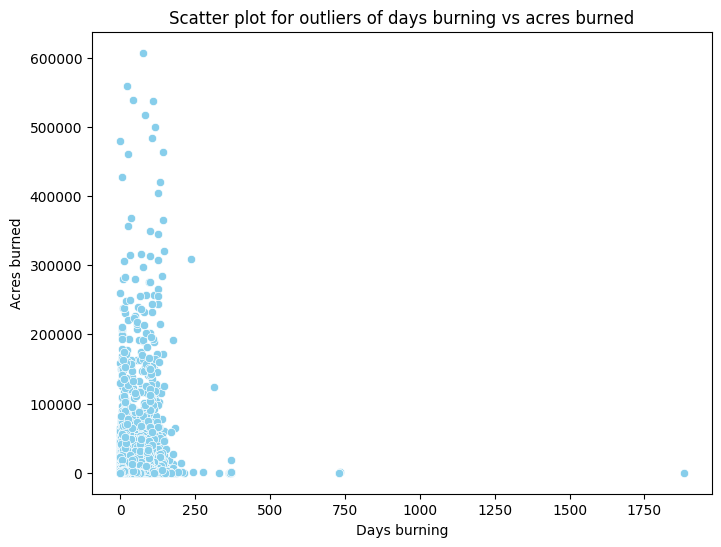

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plotting scatter plot to analyze the ouliers from the days_burning and acres_burned
plt.figure(figsize=(8, 6))
sns.scatterplot(x=result['days_burning'], y=result['acres_burned'], color='skyblue')
plt.title('Scatter plot for outliers of days burning vs acres burned')
plt.xlabel('Days burning')
plt.ylabel('Acres burned')
plt.show()

### Above plotter scatter chart shows the outliers of `acres_burned` and `days_burning` feature, it indicates that `days_burning` has less outliers than `acres_burned` where number of ouliers are comparatively 10% more than `days_burning`